In [81]:
import random
import pprint
import time
import copy
import uuid


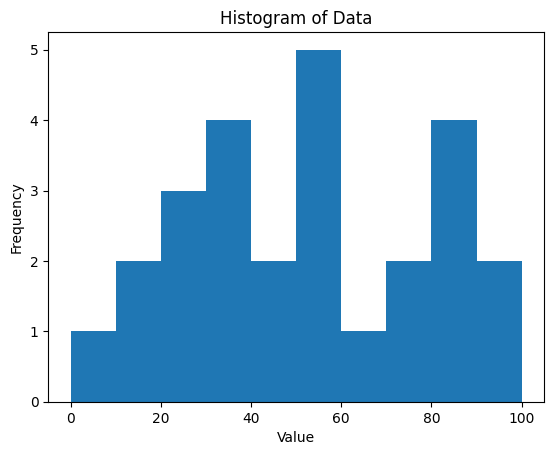

In [82]:
import matplotlib.pyplot as plt

# Define the list of data
data = [0, 78, 88, 52, 77, 17, 85, 39, 95, 37, 58, 39, 21,
        53, 10, 69, 81, 28, 32, 48, 56, 88, 59, 29, 97, 43]

# Define the number of bins and width of each bin
num_bins = 10
bin_width = 10

# Define the minimum and maximum values of the x-axis
x_min = 0
x_max = 100

# Create the histogram
plt.hist(data, bins=num_bins, range=(x_min, x_max), width=bin_width)

# Set the x-axis and y-axis labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display the histogram
plt.show()


In [83]:
# weights = [0,]
# for x in range(26):
#     w = random.randint(1,100)
#     weights.append(w)

In [84]:
itemsInfo = {}
binsInfo = {}
probabilites = [0,]
weights = [0,78, 88, 52, 77, 17, 85, 39, 95, 37, 58, 39, 21,53, 10, 69, 81, 28, 32, 48, 56, 88, 59, 29, 97, 43]
capacitites = [0,60, 100, 150]
costs = [0, 60, 100, 150]


for x in range(1,len(capacitites)):
    probabilites.append(capacitites[x]/costs[x])

for x in range(1,26):
    itemsInfo[f"item{x}"] = weights[x]

for x in range(1, 4):
    binsInfo[x] = {
        "cost": capacitites[x],
        "capacity": costs[x],
        "probability":  probabilites[x]
    }

print(itemsInfo,binsInfo)


{'item1': 78, 'item2': 88, 'item3': 52, 'item4': 77, 'item5': 17, 'item6': 85, 'item7': 39, 'item8': 95, 'item9': 37, 'item10': 58, 'item11': 39, 'item12': 21, 'item13': 53, 'item14': 10, 'item15': 69, 'item16': 81, 'item17': 28, 'item18': 32, 'item19': 48, 'item20': 56, 'item21': 88, 'item22': 59, 'item23': 29, 'item24': 97, 'item25': 43} {1: {'cost': 60, 'capacity': 60, 'probability': 1.0}, 2: {'cost': 100, 'capacity': 100, 'probability': 1.0}, 3: {'cost': 150, 'capacity': 150, 'probability': 1.0}}


In [85]:
def GenerateInitialSolution() :
    solution = {}
    s = 1
    for id,w in itemsInfo.items():
        newId = uuid.uuid4()
        validBinTypes = list(filter(lambda bin : binsInfo[bin]["capacity"] > w,binsInfo ))
        validProbabilites = tuple(map(lambda bin: binsInfo[bin]["probability"], validBinTypes))
        selectedBin = random.choices(validBinTypes,weights=validProbabilites,k=1)[0]
        remainingCapacity = binsInfo[selectedBin]["capacity"] - itemsInfo[id] 
        solution[newId] = {"bin_type": selectedBin, "item_ids": [id], "remaining_capacity": remainingCapacity}
        s+= 1
    return solution

In [86]:
def Cost(x : dict):
    totalCost = 0
    for info in x.values() :
        totalCost += binsInfo[info["bin_type"]]["cost"]
    return totalCost

In [87]:
def ChooseNeightbourhood(c1,c2,c3) :
    k = random.choices([1,2,3],weights=(c1,c2,c3),k=1)[0]
    return k


In [88]:
def RemainingCapacity(x,id):
    capacity = binsInfo[x[id]["bin_type"]]["cost"]
    weight = 0
    if len(x[id]["item_ids"]) == 0 :
        return capacity
    for itemId in x[id]["item_ids"]:
        weight += itemsInfo[itemId]
    return capacity - weight

In [89]:
def GetWeight(id):
    return itemsInfo[id]

def UnpackRepack(x : dict,binId,newCapacity,newBinType) :
    
    cap = newCapacity
    unpackedItems = []

    #Unpacking 
    while cap < 0 :
        unpackedItem = random.choice(x[binId]["item_ids"])
        unpackedItems.append(unpackedItem)
        x[binId]["item_ids"].remove(unpackedItem)
        cap += itemsInfo[unpackedItem]
    x[binId]["remaining_capacity"] = cap

    if (len(x[binId]["item_ids"]) == 0) :
        del x[binId]

    #Repacking
    unpackedItems.sort(key=GetWeight,reverse=True)
    for id in unpackedItems:
        validBins = list(filter(lambda bin: x[bin]["remaining_capacity"] > itemsInfo[id], x.keys()))
        if (len(validBins) == 0):
            newId = uuid.uuid4()
            validBinTypes = list(filter(lambda bin: binsInfo[bin]["capacity"] > itemsInfo[id], binsInfo))
            validProbabilites = tuple(map(lambda bin: binsInfo[bin]["probability"], validBinTypes))
            selectedBin = random.choices(validBinTypes, weights=validProbabilites, k=1)[0]
            remainingCapacity = binsInfo[selectedBin]["capacity"] - itemsInfo[id]
            x[newId] = {"bin_type": selectedBin, "item_ids": [id], "remaining_capacity": remainingCapacity}
        else :
            validProbabilites = tuple(map(lambda bin: x[bin]["remaining_capacity"], validBins))
            # print(f"Item : {id} {itemsInfo[id]} | Bins : {validBins} {validProbabilites}")
            selectedBin = random.choices(validBins, weights=validProbabilites, k=1)[0]
            x[selectedBin]["item_ids"].append(id)
            x[selectedBin]["remaining_capacity"] = RemainingCapacity(x, selectedBin)
            # print(f"{selectedBin} {x[selectedBin]['remaining_capacity']} ")


    return x


In [90]:
def ValidateSolution(x : dict):
    for id,info in x.items():
        print(f"Bin type : {info['bin_type']} | Item ID : {info['item_ids']} | Remaining Capacity :{info['remaining_capacity']}")
        weight = 0
        for itemId in info['item_ids'] :
            weight += itemsInfo[itemId]
        capacity = binsInfo[info['bin_type']]['capacity']
        # print(f"Calculated Weight {weight} | Calculated Capacity {capacity} | Calculated Remaining Capacity : {capacity - weight}")
        print("")

In [91]:
def Shaking(x, k):
    if (k == 1):
        shook = N1(x)
    else:
        return x
    return shook


def N1(x: dict):
    binIds = list(x.keys())
    selected_length = int(len(binIds)*0.15)
    bin_samples = random.sample(binIds, selected_length)
    for binId in bin_samples:
        newBinType = random.choice(
            [i for i in range(1, 4) if i != x[binId]["bin_type"]])
        oldCapacity = RemainingCapacity(x, binId)
        oldBinType = x[binId]["bin_type"]
        x[binId]["bin_type"] = newBinType
        newCapacity = RemainingCapacity(x, binId)
        x[binId]["remaining_capacity"] = newCapacity
        # print(f"{binId} | New : {newBinType} {newCapacity} | Old : {oldBinType} {oldCapacity}")

        if newCapacity < 0:
            x = UnpackRepack(x, binId, newCapacity, newBinType)
    return x


In [92]:
def GetCapacity(bin):
    return bin["remaining_capacity"]


def N4(x : dict):
    itemStuff = {}
    for id,info in x.items() :
        for itemId in info["item_ids"]:
            itemStuff[itemId] = {"bin_id": id, "remaining_capacity": info["remaining_capacity"]}
    for id in itemsInfo :
        binA = itemStuff[id] 
        validBins = list(filter(lambda bin: x[bin]["remaining_capacity"] > itemsInfo[id] and x[bin]["remaining_capacity"] - itemsInfo[id] < binA["remaining_capacity"] and bin != binA["bin_id"], x.keys()))
        validBinInfo = list(map(lambda bin: {"remaining_capacity": x[bin]["remaining_capacity"], "bin_id": bin}, validBins))
        validBinInfo.sort(key=GetCapacity)
        if len(validBinInfo) == 0 :
            continue 
        binB = validBinInfo[0]
        # print(itemsInfo[id],binA, binB)

        x[binA["bin_id"]]["item_ids"].remove(id)
        x[binA["bin_id"]]["remaining_capacity"] = RemainingCapacity(x, binA["bin_id"])
        if (len(x[binA["bin_id"]]["item_ids"]) == 0):
            del x[binA["bin_id"]]

        x[binB["bin_id"]]["item_ids"].append(id)
        x[binB["bin_id"]]["remaining_capacity"] = RemainingCapacity(x, binB["bin_id"])
        
        # print("After Shift :")
        # print(x[binA["bin_id"]], x[binB["bin_id"]])
        # print()
    return x

def N5(x : dict):
    print(x)

def LocalSearch(x1):
    x3 = N4(x1)
    # x4 = N5(x3)
    # x5 = N6(x4)

    return x3


def LocalSearchv2(x1):
    x3 = N4(x1)
    x4 = N5(x3)
    # x5 = N6(x4)

    return x4


In [93]:
def N1N4N5():
    x = GenerateInitialSolution()
    # print(f"Initial Bins Used {len(x.keys())}")
    oldX = copy.deepcopy(x)
    x1 = Shaking(x, 1)
    x2 = LocalSearchv2(x1)
    # print(f"Initial Cost {Cost(x)}\n")
    # ValidateSolution(x)
    # finish = False
    # count = 0
    # c1, c2, c3 = 0, 1, 1
    # startTime = time.time()
    # while not finish:
    #     #     # k = ChooseNeightbourhood(c1,c2,c3)
    #     oldX = copy.deepcopy(x)
    #     count += 1
    #     x1 = Shaking(x, 1)
    #     x2 = LocalSearchv2(x1)
    #     # print(f"Old Cost : {Cost(oldX)} New Cost : {Cost(x2)}")
    #     if (Cost(x2) < Cost(oldX)):
    #         c1 += 1
    #         updatedTime = time.time()
    #         x = x2
    #     else:
    #         x = oldX
    #     if (time.time() - startTime > 1):
    #         finish = True
    # totalTime = updatedTime - startTime
    # print(f"Total Bins Used {len(x.keys())}")
    # print(f"Final Optimised Cost {Cost(x)}")
    # print(f"Last updated time : {totalTime}")
    # print("")
    # ValidateSolution(x)

    # return Cost(x),totalTime

# N1N4N5_COST,N1N4N5_TIME = N1N4N5()

N1N4N5()

{UUID('167c5a3e-9b48-4795-a4bf-d0b6708ff145'): {'bin_type': 3, 'item_ids': ['item3', 'item24'], 'remaining_capacity': 1}, UUID('5bbe11e1-57fa-418b-a459-b036a70c8b52'): {'bin_type': 2, 'item_ids': ['item8'], 'remaining_capacity': 5}, UUID('728cf1ad-fc97-42e1-b23f-83402f2dc0d3'): {'bin_type': 2, 'item_ids': ['item10', 'item7'], 'remaining_capacity': 3}, UUID('8d303deb-4e7d-4957-be67-5e40cb055c4e'): {'bin_type': 1, 'item_ids': ['item9'], 'remaining_capacity': 23}, UUID('9f4c234f-d29a-4f22-a101-7b7d13abfde2'): {'bin_type': 1, 'item_ids': ['item13'], 'remaining_capacity': 7}, UUID('a82f468b-5106-4369-9015-dadae851c8fb'): {'bin_type': 2, 'item_ids': ['item1'], 'remaining_capacity': 22}, UUID('e5f5720c-2f05-49de-a9ef-cd49432cd964'): {'bin_type': 2, 'item_ids': ['item15', 'item12'], 'remaining_capacity': 10}, UUID('3264e980-f5ed-41c0-a051-caf2bcd5fb07'): {'bin_type': 2, 'item_ids': ['item16', 'item5'], 'remaining_capacity': 2}, UUID('274f66a5-87fb-48ee-a437-31f1ce44475a'): {'bin_type': 3, 'ite

In [94]:
def N1N4():
    x = GenerateInitialSolution()
    # print(f"Initial Bins Used {len(x.keys())}")
    # print(f"Initial Cost {Cost(x)}\n")
    # ValidateSolution(x)
    finish = False
    count = 0
    c1, c2, c3 = 0, 1, 1
    startTime = time.time()
    while not finish:
        #     # k = ChooseNeightbourhood(c1,c2,c3)
        oldX = copy.deepcopy(x)
        count += 1
        x1 = Shaking(x, 1)
        x2 = LocalSearch(x1)
        # print(f"Old Cost : {Cost(oldX)} New Cost : {Cost(x2)}")
        if (Cost(x2) < Cost(oldX)):
            c1 += 1
            updatedTime = time.time()
            x = x2
        else:
            x = oldX
        if (time.time() - startTime > 1):
            finish = True
    totalTime = updatedTime - startTime
    print(f"Total Bins Used {len(x.keys())}")
    print(f"Final Optimised Cost {Cost(x)}")
    print(f"Last updated time : {totalTime}")
    print("")
    ValidateSolution(x)

    return Cost(x),totalTime

N1N4_COST,N1N4_TIME = N1N4()

Total Bins Used 11
Final Optimised Cost 1450
Last updated time : 0.011978626251220703

Bin type : 3 | Item ID : ['item9', 'item12', 'item2'] | Remaining Capacity :4

Bin type : 2 | Item ID : ['item10', 'item7'] | Remaining Capacity :3

Bin type : 3 | Item ID : ['item1', 'item15'] | Remaining Capacity :3

Bin type : 2 | Item ID : ['item23', 'item18', 'item17', 'item14'] | Remaining Capacity :1

Bin type : 3 | Item ID : ['item16', 'item5', 'item19'] | Remaining Capacity :4

Bin type : 3 | Item ID : ['item25', 'item8'] | Remaining Capacity :12

Bin type : 3 | Item ID : ['item20', 'item6'] | Remaining Capacity :9

Bin type : 3 | Item ID : ['item21', 'item13'] | Remaining Capacity :9

Bin type : 2 | Item ID : ['item3', 'item11'] | Remaining Capacity :9

Bin type : 2 | Item ID : ['item24'] | Remaining Capacity :3

Bin type : 3 | Item ID : ['item22', 'item4'] | Remaining Capacity :14



In [95]:
def OnlyN1():
    # t0 = time.time()
    x = GenerateInitialSolution()
    # print(f"Initial Bins Used {len(x.keys())}")
    # print(f"Initial Cost {Cost(x)}\n")
    # ValidateSolution(x)
    
    finish = False
    count = 0
    c1,c2,c3 = 0,1,1
    startTime = time.time()
    while not finish:
    #     # k = ChooseNeightbourhood(c1,c2,c3)
        oldX = copy.deepcopy(x)
        count +=1
        x1 = Shaking(x,1)
        # print(f"Old Cost : {Cost(oldX)} New Cost : {Cost(x1)}")
        if (Cost(x1) < Cost(oldX)):
            c1+=1
            updatedTime = time.time()
            x = x1
        else :
            x = oldX
        if (time.time() - startTime > 1):
            finish = True
    totalTime = updatedTime - startTime
    print(f"Total Bins Used {len(x.keys())}")
    print(f"Final Optimised Cost {Cost(x)}")
    print(f"Last updated time : {totalTime}")
    print("")
    ValidateSolution(x)

    return Cost(x), totalTime

N1_COST,N1_TIME = OnlyN1()

Total Bins Used 13
Final Optimised Cost 1500
Last updated time : 0.13856124877929688

Bin type : 3 | Item ID : ['item3', 'item24'] | Remaining Capacity :1

Bin type : 2 | Item ID : ['item4', 'item5'] | Remaining Capacity :6

Bin type : 2 | Item ID : ['item9', 'item25'] | Remaining Capacity :20

Bin type : 3 | Item ID : ['item10', 'item6'] | Remaining Capacity :7

Bin type : 2 | Item ID : ['item13', 'item7'] | Remaining Capacity :8

Bin type : 2 | Item ID : ['item14', 'item16'] | Remaining Capacity :9

Bin type : 2 | Item ID : ['item15', 'item23'] | Remaining Capacity :2

Bin type : 2 | Item ID : ['item17', 'item18', 'item12'] | Remaining Capacity :19

Bin type : 2 | Item ID : ['item19', 'item11'] | Remaining Capacity :13

Bin type : 3 | Item ID : ['item20', 'item2'] | Remaining Capacity :6

Bin type : 2 | Item ID : ['item8'] | Remaining Capacity :5

Bin type : 2 | Item ID : ['item21'] | Remaining Capacity :12

Bin type : 3 | Item ID : ['item1', 'item22'] | Remaining Capacity :13



In [96]:
print(f"N1 | Cost = {N1_COST} | Time = {N1_TIME}")
print(f"N1 and N4 | Cost = {N1N4_COST} | Time ={N1N4_TIME}")


N1 | Cost = 1500 | Time = 0.13856124877929688
N1 and N4 | Cost = 1450 | Time =0.011978626251220703
